# Analysis of Housing Data - Regression Models
##### Asia Mitchell - May 1st, 2016
Here, I have used the Boston Housing dataset from the CMU StatLib Library to implement regression models to predict the median value of housing in thousands. This dataset contains 13 attribute values (1 binary attribute, and the remaining are continuous).

#### Import Libraries

In [14]:
%matplotlib inline
import numpy as np
import os, sys, string
import matplotlib.pyplot as plt
import pandas
import seaborn as sns

In [15]:
### List of Housing Headers
headers = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
           "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

In [24]:
### Read Housing Data
housing_all = np.loadtxt('../Better/housing.txt')
housing_train = np.loadtxt('../Better/housing_train.txt')
housing_test = np.loadtxt('../Better/housing_test.txt')

In [5]:
n_attr = housing_all.shape[1]

#### Calculate and report correlations between the first 13 attributes and the target attribute (MEDV)

In [8]:
### Calculate and store correlation coefficient
a = []
for i in range(0, (n_attr-1)):
    b = np.corrcoef(housing_all[:,i], housing_all[:,-1])
    a.append(b[1][0])

In [11]:
### Print correlation coefficient and header
for i in range(0, len(a)):
    print headers[i], ": ", a[i]
print "Attribute with the largest positive correlation:", headers[a.index(max(a))], max(a)
print "Attribute with the largest negative correlation:", headers[a.index(min(a))], min(a)

CRIM :  -0.388304608587
ZN :  0.360445342451
INDUS :  -0.483725160028
CHAS :  0.17526017719
NOX :  -0.427320772373
RM :  0.695359947072
AGE :  -0.376954565005
DIS :  0.249928734086
RAD :  -0.38162623064
TAX :  -0.468535933568
PTRATIO :  -0.507786685538
B :  0.333460819657
LSTAT :  -0.737662726174
Attribute with the largest positive correlation: RM 0.695359947072
Attribute with the largest negative correlation: LSTAT -0.737662726174


#### Plot all attributes vs the target attribute (MEDV)

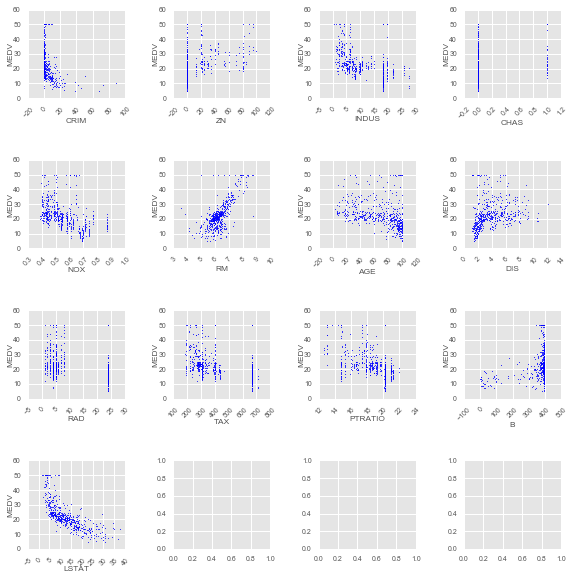

In [22]:
fig, axarr = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
fig.tight_layout()
plt.rcParams.update({'xtick.labelsize' : 'x-small'})
plt.rcParams.update({'ytick.labelsize' : 'x-small'})
plt.rcParams.update({'axes.xmargin' : 0.03})
plt.rcParams.update({'axes.ymargin': 0})

fig.subplots_adjust(wspace=0.5, hspace=0.7)
b = 0
for i in range(0, n_attr-1):
    if b == 4:
        b = 0
    if i < 4:
        row = 0
    elif i < 8:
        row = 1
    elif i < 12:
        row = 2
    else:
        row = 3
    col = b
    axarr[row, col].scatter(housing_all[:,i], housing_all[:,-1], c='blue', lw=0, s=1)
    axarr[row, col].set_xlabel(headers[i], fontsize='small', labelpad=0)
    axarr[row, col].set_ylabel(headers[-1], fontsize='small', labelpad=0)
    for tick in axarr[row, col].get_xticklabels():
        tick.set_rotation(45)
    b = b+1
plt.show()

#### Calculate and report correlations between the 14 columns

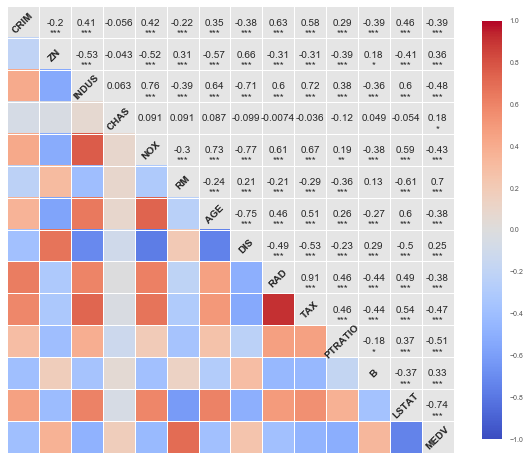

In [87]:
f, ax = plt.subplots(figsize=(10, 10))
df = pandas.DataFrame(housing_all, columns=headers)
corr_df = df.corr()
sns.corrplot(df, ax=ax)
plt.show()

# Multivariate Linear Regression Model

### Implement and fit a Linear Regression model to portion of the housing data (training set) to predict the target variable (MDEV)

#### Write a function, LR_solve, which calculates the parameters for a linear regression model

In [36]:
# FUNCTION: LR_solve(X, y)
# X is a matrix of attributes
# y is the target matrix
# Returns weights, a vector of coefficients for a multiple 
# linear regression model
def LR_solve(X, y):
    rows = X.shape[0]
    y = np.reshape(y, (rows,1))
    # (rows X 1) matrix of 1's for the intercept
    intcpt = np.ones((rows,1))
    # append a column of 1's to attributes matrix
    attrbts = np.concatenate((intcpt, X), axis=1) 
    # calculate weights
    # calculate the dot prodcut matrix and take the inverse
    a = np.linalg.inv(attrbts.T.dot(attrbts))
    # calculate the dot product of the attribute matrix and
    # the target matrix
    b = attrbts.T.dot(y)
    weights = a.dot(b)
    return weights

#### Write a function, LR_predict, which predicts the target variable using parameters for a linear regression model

In [37]:
# FUNCTION: LR_predict(X, w)
# X is a matrix of attributes
# w a vector of coefficients for a multiple linear regression model
# Returns y, a vector of predicted target values
def LR_predict(X, w):
    rows = X.shape[0]
    # (rows X 1) matrix of 1's for the intercept
    intcpt = np.ones((rows,1))
    # append a column of 1's to attributes matrix
    attrbts = np.concatenate((intcpt, X), axis=1) 
    # calculate the target value
    y = np.sum((attrbts.dot(w)), axis=1)
    return y

#### Write a function, MSE, which calculates the mean squared error of the actual and predict target value

In [49]:
# FUNCTION: MSE(Y, y)
# Calculates the mean squared error of the actual target value (y)
# and the predicted target value 
# y_pred is an array of predicted y values
# y_obs is an array of actual target values 
def mse(pred, obs):
    err = np.square((pred - obs)).mean(axis=None)
    return err

#### Separate attribute columns from target column

In [39]:
trainX = housing_train[:,(0,1,2,3,4,5,6,7,8,9,10,11,12)]
trainY = housing_train[:,-1]
    
testX = housing_test[:,(0,1,2,3,4,5,6,7,8,9,10,11,12)]
testY = housing_test[:,-1]

#### Compute and print the weights from training set

In [40]:
w_train = LR_solve(trainX, trainY)
for i, j in enumerate(w_train):
    if i == 0:
        print "INTCPT\t", j[0]
    else:
        print headers[i-1],"\t", j[0]

INTCPT	39.584321218
CRIM 	-0.101137046413
ZN 	0.0458935299244
INDUS 	-0.00273038670003
CHAS 	3.0720134021
NOX 	-17.2254071822
RM 	3.71125235458
AGE 	0.00715862492153
DIS 	-1.59900210249
RAD 	0.373623374977
TAX 	-0.0157564196974
PTRATIO 	-1.02417702965
B 	0.00969321450511
LSTAT 	-0.585969273056


#### Compute and print estimated target values of training set

In [43]:
y_train = LR_predict(trainX, w_train)
y_test = LR_predict(testX, w_train)

#### Learn weights from training set. Compute and print mean squared error of predictor

In [51]:
m_train = mse(y_train, trainY)
print "Mean Squared Error of Training Set: ", m_train

m_test = mse(y_test, testY)
print "Mean Squared Error of Testing Set: ", m_test

Mean Squared Error of Training Set:  22.081273187
Mean Squared Error of Testing Set:  22.6382562966


### Use Online Gradient Descent to implement and fit a Linear Regression model 

#### Write a function to normalize the input data for the gradient descent implementation

In [53]:
# FUNCTION: InptNorm(X)
# Mean centers down each column
# Divide by the range of values 
def InptNorm(X):
    cols = X.shape[1]
    for i in range(cols):
        mu = X[:,[i]].mean(axis=None)
        #sigma = X[:,[i]].var(axis=None)
        #sigma = np.sqrt(sigma)
        sigma = max(X[:,[i]]) - min(X[:,[i]])
        X[:,[i]] = (X[:,[i]] - mu) / sigma
    return X

#### Write a function that computes that uses online gradient descent to compute  model parameters 

In [57]:
# FUNCTION: OL_graddesc(X, y, i)
# Calculates online gradient descent
# X is an array of x-values
# y is an array of target values (y)
# i is the number of iterations
# step is the learning rate
def OnLGradDesc(X, y, i, step):
    rows = X.shape[0]
    cols = X.shape[1]
    # matrix of 0's for the weights
    weights = np.zeros((cols+1, 1))
    # matrix of 1's for the intercept
    intcpt = np.ones((rows,1))
    # append a column of 1's to attributes matrix
    attrbts = np.concatenate((intcpt, X), axis=1)
    t = 1.0
    x = 0
    while (t <= i):
        obs = attrbts[x]
        obs = np.reshape(obs,(1,obs.shape[0]))
        target = y[x]
        
        # Calculate the predicted target value
        pred = np.sum(obs.dot(weights), axis=1)

        # Calculate the error
        err = target - pred    
        grad = err * obs
        
        # Calculate the weights for all attributes
        weights += (step * grad.T)
        t += 1
        #step = float(2.0)/np.sqrt(float(x))        
        step = float(2.0)/float(t)
        x += 1
        if x == rows:
            x = 0
    return weights

#### Write functions to graph the progress of the online gradient descent

In [59]:
# Initialize array to hold data to graph
def init_progress_graph():    
    pgraph = np.zeros((0,3))
    #pgraph = np.append(pgraph, np.zeros((1,3)), axis=0)
    return pgraph

In [73]:
# Append data to array
# Graph mean squared error for each 50 iterations for both training and
# testing sets.
# Return array of errors
def add_to_progress_graph(pgraph, step, train, test):
    # Append current errors to array of previos errors
    pgraph = np.append(pgraph, np.array([[step, train, test]]), axis=0)
    
    # plot training progress
    plt.plot(pgraph[:,0], pgraph[:,1], '-b', label="Train")

    # plot testing progress
    plt.plot(pgraph[:,0], pgraph[:,2],'--r', label="Test")
    
    # Add axis labels and legend to graph
    plt.xlabel('Step')
    plt.ylabel('Mean squared error')
    plt.title('Progress of mean errors') 
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

    plt.show()
    return pgraph

In [63]:
# Plot the changes in mean train and test errors for every I_section iterations
# for a total of I_total iterations.
# Requires training and testing data as input.
def plot_progress(I_total, I_section, trainX, trainY, testX, testY):
    i = 0
    mse_graph = init_progress_graph()
    
    while i < I_total:
        # Increment the iterations by I_section
        i += I_section
        
        # Calculate the weights
        w_train = OnLGradDesc(trainX, trainY, i, 2)
        
        # Predict target values for the training and testing set
        y_train = LR_predict(trainX, w_train)
        y_test = LR_predict(testX, w_train)
        
        # Calculate and print the error for the training and testing sets
        m_train = mse(y_train, trainY)
        m_test = mse(y_test, testY)
        
        mse_graph = add_to_progress_graph(mse_graph, i, m_train, m_test)

#### Normalize attribute matrix

In [64]:
norm_train = InptNorm(housing_train)
norm_test = InptNorm(housing_test)

#### Separate attribute columns from predictor column

In [65]:
trainX = norm_train[:,(0,1,2,3,4,5,6,7,8,9,10,11,12)]
trainY = norm_train[:,-1]

testX = norm_test[:,(0,1,2,3,4,5,6,7,8,9,10,11,12)]
testY = norm_test[:,-1]

#### Calculate weights using an anneled learning rate of 2/n

In [66]:
w_train = OnLGradDesc(trainX, trainY, 1000, 2)

print "\nWeights for normalized data:"
for i, j in enumerate(w_train):
    if i == 0:
        print "INTCPT\t", j[0]
    else:
        print headers[i-1],"\t", j[0]


Weights for normalized data:
INTCPT	-0.011808764049
CRIM 	-0.0116037480898
ZN 	0.036461469065
INDUS 	-0.0396490302477
CHAS 	0.0333349086252
NOX 	-0.0307766527395
RM 	0.135735561307
AGE 	-0.0837062080026
DIS 	-0.0384844648646
RAD 	-0.0389047963932
TAX 	-0.0514481253607
PTRATIO 	-0.0653060850331
B 	0.0229435649009
LSTAT 	-0.180097895034


#### Predict target values for the training and testing set.

In [69]:
y_train = LR_predict(trainX, w_train)
y_test = LR_predict(testX, w_train)

#### Plot the changes in mean train and test errors after every 50 iterations

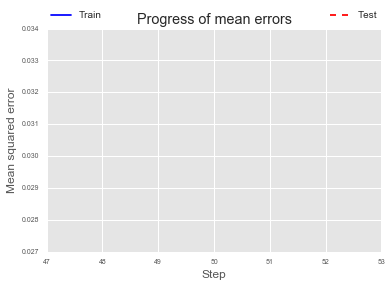

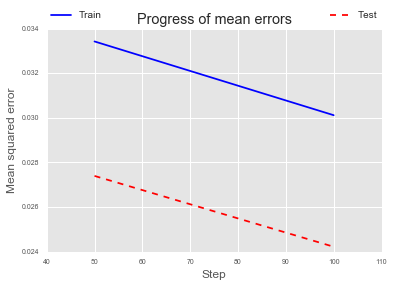

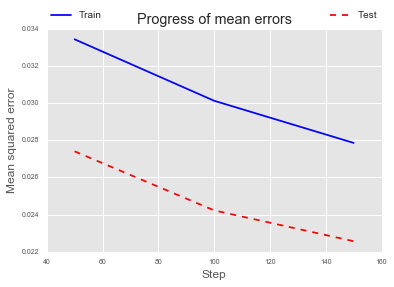

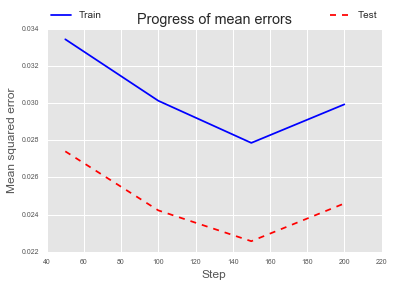

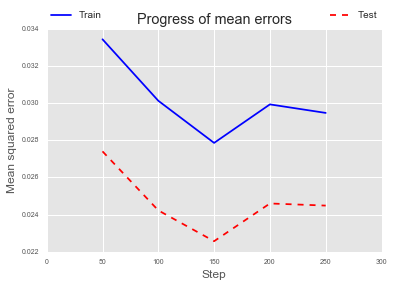

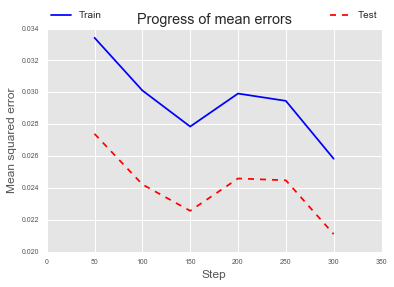

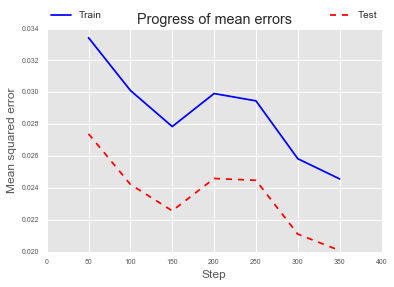

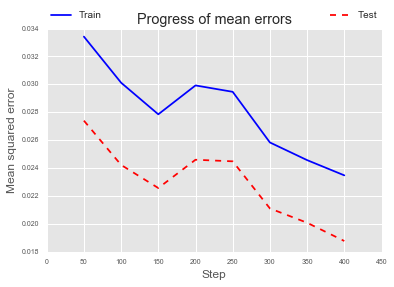

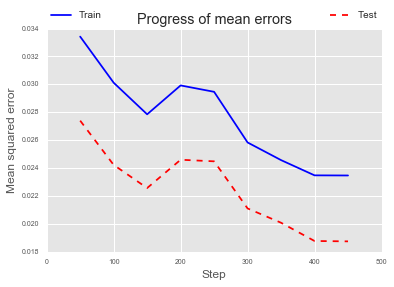

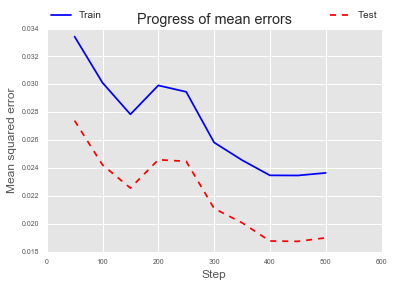

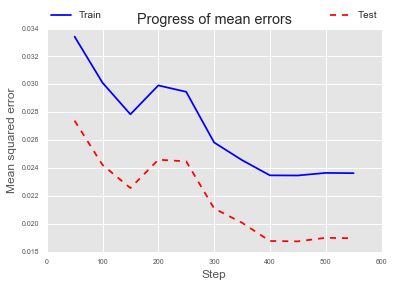

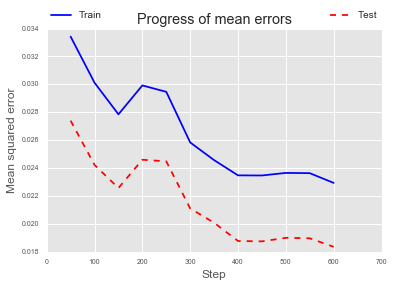

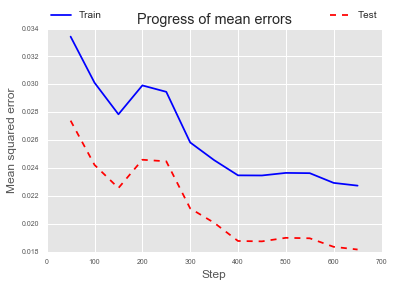

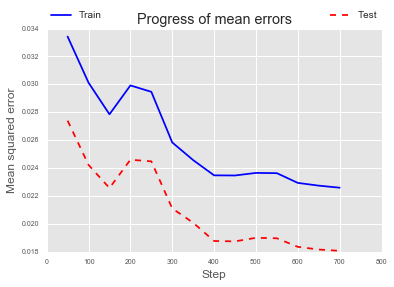

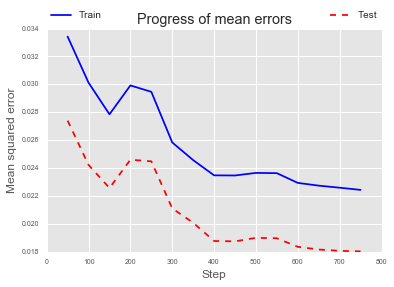

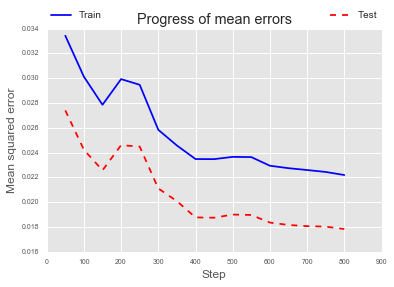

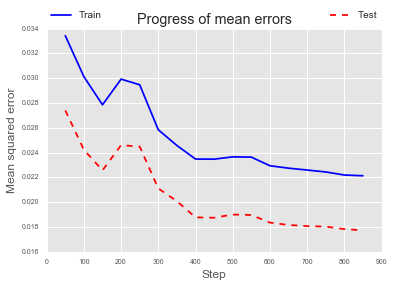

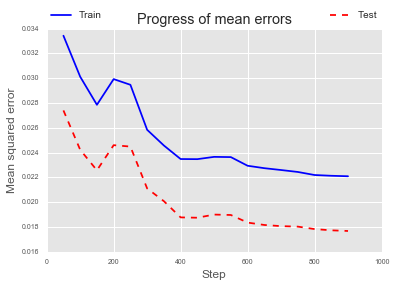

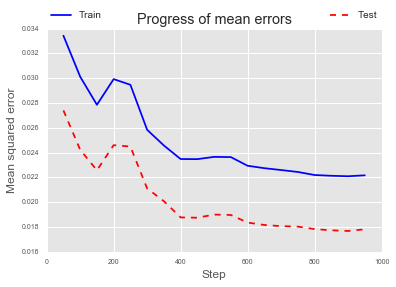

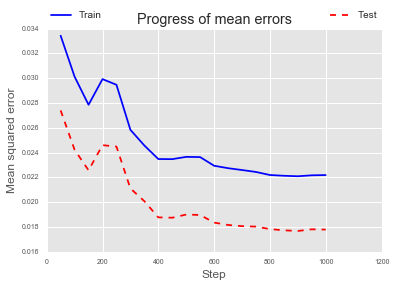

In [72]:
plot_progress(1000, 50, trainX, trainY, testX, testY)

#### Print errors for the training and testing set.

In [68]:
m_train = mse(y_train, trainY)
print "Mean Squared Error of Normalized Training Set: ", m_train

m_test = mse(y_test, testY)
print "Mean Squared Error of Normalized Testing Set: ", m_test  

Mean Squared Error of Normalized Training Set:  0.0221846574556
Mean Squared Error of Normalized Testing Set:  0.0177885581354


# Multivariate Polynomial Regression Model

### Implement and fit a 2nd Degree Polynomial Regression model to portion of the housing data (training set) to predict the target variable (MDEV)

#### Write a function, Extendx, which calculates and returns all linear and 2nd degree polynomials

In [78]:
# FUNCTION: Extendx(x)
# x is a vector of inputs or features
# Returns eX, an expanded matrix of x containing all linear
# and two degree polynomial
# x, x^2
def Extendx(X):
    rows = X.shape[0]
    cols = X.shape[1]
    
    # Initialize an empty matrix to store all linear & 2nd degree polynomials
    eX = np.zeros((rows, ((cols*cols) - np.arange(0, cols).sum())))
    
    for i in range(0,rows):
        # Compute all 2nd degree polynomials as a matrix
        obs = X[i]
        obs = np.reshape(obs,(1,obs.shape[0]))
        a = obs.T.dot(obs)
        
        # Combine like terms
        #b = np.triu(a, k=0) + np.tril(a, k=-1)
        b = np.tril(a, k=-1) + np.tril(a, k=0)
        c = np.tril_indices(b.shape[0])
        
        # Linearize matrix and store 1-D matrix in extended matrix
        eX[i] = b[c].flatten()
        
    # Append the mononomials to the matrix of 2nd degree polynomials
    Xall = np.concatenate((X, eX), axis=1)    
    return Xall

#### Write a function, Poly_solve, which calculates the parameters for a 2nd degree polynomial regression model

In [79]:
# FUNCTION: Poly_solve(X, y):
# X is a matrix of linear and two degree polynomials
# y is a vector of the output
# Returns y, a vector of the target variable
def Poly_solve(X, y):    
    rows = X.shape[0]
    y = np.reshape(y, (rows,1))
    # (rows X 1) matrix of 1's for the intercept
    intcpt = np.ones((rows,1))
    # append a column of 1's to attributes matrix
    attrbts = np.concatenate((intcpt, X), axis=1) 
    # calculate weights
    # calculate the dot prodcut matrix and take the inverse
    a = np.linalg.inv(attrbts.T.dot(attrbts))
    # calculate the dot product of the attribute matrix and
    # the target matrix
    b = attrbts.T.dot(y)
    weights = a.dot(b)    
    return weights 

#### Write a function, Poly_predict, which predicts the target variable using parameters for a 2nd degree polynomial regression model

In [80]:
# FUNCTION: Poly_predict(X, w):
# X is a matrix of linear and two degree polynomials
# w is a vector of coefficients for a 2 degree polynomial
# regression model.
# Returns, a vector of coefficients for a 2 degree polynomial
# regression model.
def Poly_predict(X, w):    
    rows = X.shape[0]
    # (rows X 1) matrix of 1's for the intercept
    intcpt = np.ones((rows,1))
    # append a column of 1's to attributes matrix
    attrbts = np.concatenate((intcpt, X), axis=1) 
    # calculate the target value
    y = np.sum((attrbts.dot(w)), axis=1)    
    return y

#### Separate attribute columns from predictor column

In [81]:
trainX = housing_train[:,(0,1,2,4,5,6,7,8,9,10,11,12)]
trainY = housing_train[:,-1]

testX = housing_test[:,(0,1,2,4,5,6,7,8,9,10,11,12)]
testY = housing_test[:,-1]

#### Compute the expanded matrix of 1st and 2nd degree polynomials

In [82]:
trainX = Extendx(trainX)
testX = Extendx(testX)

#### Compute the weights from training set

In [83]:
w_train = Poly_solve(trainX, trainY)

#### Compute and print estimated target values of training set

In [84]:
y_train = Poly_predict(trainX, w_train)
y_test = Poly_predict(testX, w_train)

#### Compute and print mean squared error of predictor

In [86]:
m_train = mse(y_train, trainY)
print "Mean Squared Error of Training Set: ", m_train

m_test = mse(y_test, testY)
print "Mean Squared Error of Testing Set: ", m_test  

Mean Squared Error of Training Set:  0.00332005074247
Mean Squared Error of Testing Set:  0.0831596696331
